In [3]:
import pandas as pd 
import numpy as np
import scipy as sp
from scipy.stats import linregress
import glob, os, sys
import matplotlib.pyplot as plt
sys.path.append('../')
from ReadData import ReadFiles

In [41]:
path = r'../Lab2/data/*.csv'
files = glob.glob(path)
input_params = ['Material','Gage Diameter','Extensometer Gage Length','Final Gage Diameter','Rockwell Hardness','Rockwell Scale','(s)']
brass_data = ReadFiles(files,input_params)['BR']
brass_data['data']

Failed to find parameter "Final Gage Diameter" in ../Lab2/data/N02DBR_1.csv 
Make sure you spelled it right / it exists (it may     not)

Done :)
CSV labels are:  Index(['(s)', '(mm)', '(kN)', '(mm/mm)'], dtype='object')


array([[ 0.0000e+00,  0.0000e+00,  2.9880e-01, -1.1780e-05],
       [ 5.0000e-01,  3.0000e-02,  8.7530e-01,  1.9940e-04],
       [ 1.0000e+00,  7.0000e-02,  1.3010e+00,  3.4470e-04],
       ...,
       [ 2.4966e+02,  1.1780e+01,  1.2790e+01,  2.8190e-01],
       [ 2.5016e+02,  1.1810e+01,  1.2670e+01,  2.8340e-01],
       [ 2.5022e+02,  1.1820e+01,  7.0070e+00,  2.9520e-01]])

## Question 1

In [22]:
data_types = [1,2,3,4] #["ar5", "aar5", "ar25", "aar25"]
data = {}

for key in data_types: data[key] = {}

# as rolled 2.5mm data - FIRST PICTURE
data[1]["section"] = "N"
data[1]["group"] = "B"
data[1]["t"] = 5.0
data[1]["condition"] = "As Rolled"
data[1]["before"] = [5.60, 6.70, 7.21, 8.38] # at mark 1,2,3,4
data[1]["after"] = [4.96, 4.98, 4.98, 5.03]
data[1]["width"] = [19.17, 19.77]
data[1]["hardness"] = [25.6, 29.0, 25.0, 26.7]

# annealed as rolled 5mm data - SECOND PICTURE
data[2]["section"] = "M"
data[2]["group"] = "A"
data[2]["t"] = 5.0
data[2]["condition"] = "Annealed and As Rolled"
data[2]["before"] = [5.61, 6.24, 7.15, 8.31] # at mark 1,2,3,4
data[2]["after"] = [4.96, 4.98, 4.98, 5.02]
data[2]["width"] = [19.17, 19.77]
data[2]["hardness"] = [23.9, 26.8, 26.6, 25.6]

data[2]["fh1"] = [58.2, 59.1, 56.6]
data[2]["fh2"] = [62.0, 60.2, 60.5]
data[2]["fh3"] = [61.8, 61.6, 60.3]
data[2]["fh4"] = [62.8, 63.6, 61.4]

# as rolled 5mm data - THIRD PICTURE
data[3]["section"] = "N"
data[3]["group"] = "A"
data[3]["t"] = 5.0
data[3]["condition"] = "As Rolled"
data[3]["before"] = [5.60, 6.47, 7.30, 8.44] # at mark 1,2,3,4
data[3]["after"] = [5.00, 4.99, 5.07, 5.05, 5.05]
data[3]["width"] = [19.17, 19.65]
data[3]["hardness"] = [30.1, 26.3, 28.4, 27.8]

# annealed and as rolled 2.5mm data - FOURTH PICTURE
data[4]["section"] = "N"
data[4]["group"] = "B"
data[4]["t"] = 2.5
data[4]["condition"] = "Annealed and As Rolled"
data[4]["before"] = [5.57, 6.24, 7.12, 8.26] # at mark 1,2,3,4
data[4]["after"] = [2.54, 2.53, 2.53, 2.54]
data[4]["width"] = [19.17, 20.5] # assumed width because the data is missing
data[4]["hardness"] = [24.1, 28.7, 26.6, 29.3]

data[4]["fh1"] = [59.3, 55.9, 57.2]
data[4]["fh2"] = [60.0, 61.3, 58.8]
data[4]["fh3"] = [57.7, 57.7, 57.1]
data[4]["fh4"] = [58.3, 58.3, 58.0]

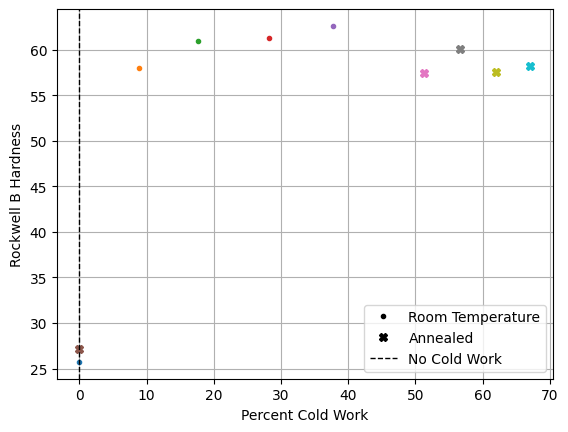

In [35]:
for i in [2,4]:
    # hardnesses
    h0 = np.mean(np.array(data[i]["hardness"]))
    
    h1 = np.mean(np.array(data[i]["fh1"]))
    h2 = np.mean(np.array(data[i]["fh2"]))
    h3 = np.mean(np.array(data[i]["fh3"]))
    h4 = np.mean(np.array(data[i]["fh4"]))

    # cold work percent
    Ai1 = data[i]["width"][0] * data[i]["before"][0]
    Ai2 = data[i]["width"][0] * data[i]["before"][1]
    Ai3 = data[i]["width"][0] * data[i]["before"][2]
    Ai4 = data[i]["width"][0] * data[i]["before"][3]
    
    Af1 = data[i]["width"][1] * data[i]["after"][0]
    Af2 = data[i]["width"][1] * data[i]["after"][1]
    Af3 = data[i]["width"][1] * data[i]["after"][2]
    Af4 = data[i]["width"][1] * data[i]["after"][3]

    cwp1 = (Ai1 - Af1) / Ai1 * 100
    cwp2 = (Ai2 - Af2) / Ai2 * 100
    cwp3 = (Ai3 - Af3) / Ai3 * 100
    cwp4 = (Ai4 - Af4) / Ai4 * 100

    # plotting
    m = '.' if i ==2 else 'X' 
    lab = 'Room Temperature' if i==2 else 'Annealed'
    plt.plot(0, h0,m)
    plt.plot([],[],m,color='k',label = lab)

    plt.plot(cwp1, h1,m)
    plt.plot(cwp2, h2,m)
    plt.plot(cwp3, h3,m)
    plt.plot(cwp4, h4,m)
plt.axvline(0,linestyle='--',linewidth = 1,color = 'k',label = 'No Cold Work')
plt.legend()
plt.grid()
plt.xlabel("Percent Cold Work")
plt.ylabel("Rockwell B Hardness")
plt.savefig("plots/q1_all.png", dpi=600)
plt.show()

## Question 2

In [58]:
def stress_strain():
    strain = np.array(brass_data['data'][:,3])
    
    force = np.array(brass_data["data"][:,2])
    radius = float(brass_data["Gage Diameter"]) / 2
    
    stress = force / radius**2 / np.pi

    return strain, stress

strain, stress = stress_strain()
bounds = [[1,69], [94, 159], [241, 321]]
strengths = [stress[ub]*1000 for lb, ub in bounds]

slopes = []

for lb, ub in bounds:
    _x, _y = strain[lb:ub], stress[lb:ub]
    m = sp.stats.linregress(_x, _y).slope
    slopes.append(m)

q6df = pd.DataFrame([slopes, strengths])
q6df.index = ["Elastic Modulus [GPa]", "Yield Strength [MPa]"]
q6df

,0,1,2
Elastic Modulus [GPa],52.905597,55.627480,46.344772
Yield Strength [MPa],276.065056,322.976466,367.677392


% increase in stress:  16.582966247243586


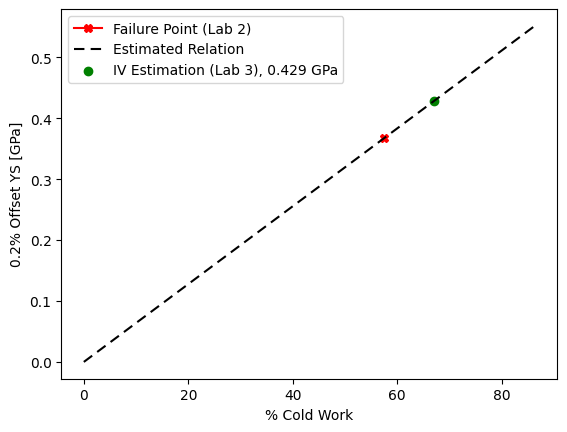

In [54]:
Ai = (float(brass_data["Gage Diameter"]) / 2)**(2) * np.pi
Af = (4.69 / 2)**(2) * np.pi

pcw = (Ai - Af) / Ai * 100
ys = strengths[-1]

x = np.linspace(0, 1.5*pcw, 1000)
y = np.linspace(0, 1.5*ys, 1000)

ys4 = (ys / pcw) * cwp4

plt.plot(pcw, ys*1000,marker='X', label=("Failure Point (Lab 2)"), c='r')
plt.plot(x, y*1000, label="Estimated Relation", color = 'k',ls=(0,(5,3)))

#plt.axvline(cwp4, ls=(0,(5,3)), c='k', label="% CW IV (Lab 3)")
plt.scatter(cwp4, ys4*1000, label="IV Estimation (Lab 3), {} GPa".format(round(ys4, 3)), c='g')

plt.xlabel("% Cold Work")
plt.ylabel("0.2% Offset YS [GPa]")

plt.legend()
plt.savefig("plots/q2.png", dpi=600)

per_inc = 100 * (ys4 - ys) / ys
# percent increase in strength
print("% increase in stress: ", per_inc)


## Question 3

In [59]:
q3d = {}

for thickness in [5, 2.5]: 
    q3d[thickness] = {}
    for mark in [2, 4]:
        q3d[thickness][mark] = {}
        for temp in [350, 400, 450, 500]:
            q3d[thickness][mark][temp] = []

# entering data
q3d[5][2][350] = [25, 74, 66]
q3d[5][2][400] = [29, 76, 64]
q3d[5][2][450] = [27, 75, 44]
q3d[5][2][500] = [23, 72, 36]

q3d[5][4][350] = [25, 84, 65]
q3d[5][4][400] = [29,84,62]
q3d[5][4][450] = [27,85,53]
q3d[5][4][500] = [23,84,45]

q3d[2.5][2][350] = [25,89,65]
q3d[2.5][2][400] = [29,89,64]
q3d[2.5][2][450] = [27,89,58]
q3d[2.5][2][500] = [23,89,50]

q3d[2.5][4][350] = [25,90,67]
q3d[2.5][4][400] = [29,90,67]
q3d[2.5][4][450] = [27,90,60]
q3d[2.5][4][500] = [23,90,52]

Critical Homo Temp: 0.45698924731182794


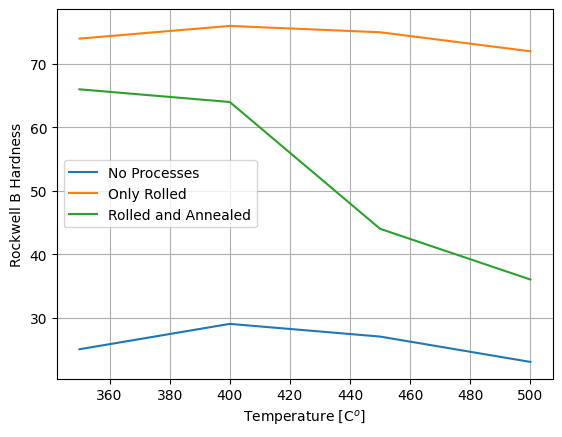

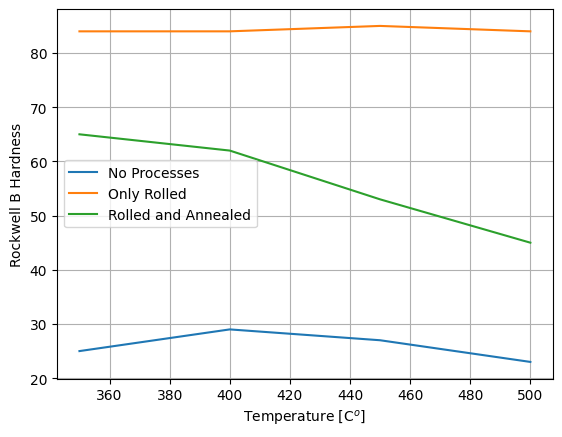

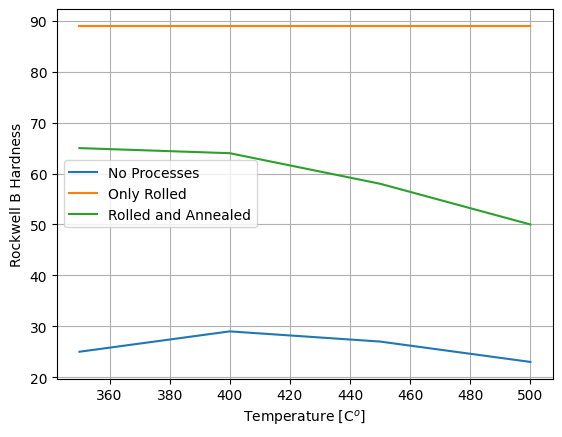

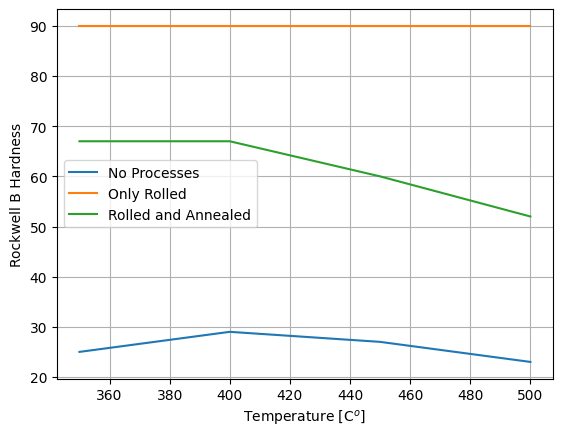

In [65]:
t_melt = 930
t_crit = 425

t_crit_homo = t_crit / t_melt
print("Critical Homo Temp:", t_crit_homo)

for t in q3d.keys():
    for m in q3d[t].keys():
        temps = [350, 400, 450, 500]
        
        hardo = []
        hardr = []
        harda = []
        
        for temp in temps:
            hardo.append(q3d[t][m][temp][0])
            hardr.append(q3d[t][m][temp][1])
            harda.append(q3d[t][m][temp][2])

        plt.plot(temps, hardo, label="No Processes")
        plt.plot(temps, hardr, label="Only Rolled")
        plt.plot(temps, harda, label="Rolled and Annealed")

        plt.legend()
        plt.ylabel("Rockwell B Hardness")
        plt.xlabel("Temperature [C$^o$]")
        plt.grid()
        if t == 2.5: plt.savefig("plots/q3_25-{}.png".format(m),dpi=600)
        if t == 5: plt.savefig("plots/q3_5-{}.png".format(m),dpi=600)
        plt.show()

## Question 5

In [68]:
tri = 8.26
tai = 8.31

trf = 1.19
taf = 0.92

# percent reductions
pa = abs(taf - tai) / tai * 100
pr = abs(trf - tri) / tri * 100

print("% Reduction, annealed:",pa)
print("% Recuction, rolled:",pr)

% Reduction, annealed: 88.92900120336944
% Recuction, rolled: 85.59322033898306
